# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [Student 1]([link](https://github.com/username1))
- [Student 2]([link](https://github.com/username2))

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [39]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(50)
rng = np.random.normal(0,1,size=(2,))
rng2 = np.random.normal(0,1,size=(2,))
print(rng,rng2)


[-1.56035211 -0.0309776 ] [-0.62092842 -1.46458049]


In [13]:
def f_rng(niter):
    np.random.seed(0)
    return np.random.normal(0,1,size=(niter,2))

In [16]:
f_rng(10)

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574]])

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

**Answer:**

In [31]:
import numpy as np

def brownian_motion(niter, x, step,rng):
    """
    Simule un mouvement brownien jusqu'à ce qu'il atteigne la limite de la boule unité B(0,1).

    Paramètres :
    - niter (int) : Nombre maximum d'itérations.
    - x (ndarray) : Point de départ dans la boule unité B(0,1).
    - step (float) : Taille de pas.
    - rng  : Générateur aléatoire.

    Retourne :
    - W (ndarray) : Ensemble de la marche aléatoire complète.
    - W_star (ndarray ou None) : Point d'intersection entre la dernière trajectoire et B(0,1), None si non applicable.
    """

    # Initialise la marche aléatoire
    W = [x]
    for i in range(niter):
        # Génère un pas aléatoire
        rng = np.random.normal(0,1,size=(2,))
        delta = np.sqrt(step) * rng

        # Effectue une étape de la marche aléatoire
        x_new = W[-1] + delta

        # Vérifie si la nouvelle position est à l'intérieur de la boule unité
        if np.linalg.norm(x_new) <= 1.0:
            W.append(x_new)
        else:
            # Effectue une interpolation linéaire pour trouver le point d'intersection avec la boule unité
            distance =np.linalg.norm(x_new-W[-1])
            alpha = 1-distance
            W_intersection = W[-1] +alpha*(x_new-W[-1])
            W.append(W_intersection)
            return np.array(W), W_intersection

    # Si la limite de niter itérations est atteinte sans atteindre la boule unité, retourne la trajectoire complète
    return np.array(W), None
brownian_motion(100, [-0.1,0.2], 0.01, rng)

(array([[-0.1       ,  0.2       ],
        [-0.1157667 ,  0.42567235],
        [-0.18623673,  0.51999842],
        [-0.1115179 ,  0.40110393],
        [-0.0341926 ,  0.28271586],
        [-0.30010982,  0.34334782],
        [-0.47569888,  0.38844126],
        [-0.54409997,  0.55439634],
        [-0.43724903,  0.50905776],
        [-0.50603279,  0.38765002],
        [-0.55012505,  0.35961447],
        [-0.58659441,  0.37528486],
        [-0.52874226,  0.4102503 ],
        [-0.60515665,  0.26647115],
        [-0.46870347,  0.19752624],
        [-0.53393283,  0.1454073 ],
        [-0.71823978,  0.0976099 ],
        [-0.76620536,  0.15964573],
        [-0.69635965,  0.16002282],
        [-0.60317481,  0.19401932],
        [-0.60474302,  0.21011214],
        [-0.62380837,  0.17062719],
        [-0.65058172,  0.05782605],
        [-0.62253755, -0.04148631],
        [-0.53837443, -0.06643217],
        [-0.53342493, -0.01704849],
        [-0.46909348, -0.17411083],
        [-0.48978385, -0.086

In [32]:
np.linalg.norm(np.array([-1.07469977,  0.15485259])) 

1.0857987475898843

On remarque que notre machine fait des erreurs de calculs la norme n'est pas égale à 1 mais on est proche 

3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

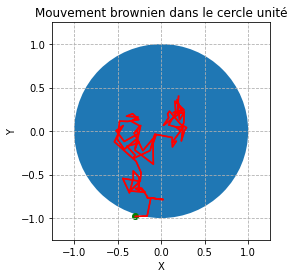

In [34]:
B_M,W_intersection = brownian_motion(10000, [0.2,0.4], 0.01, rng)
circle = plt.Circle((0,0), 1)
fig, ax = plt.subplots()
plt.plot(B_M[:, 0],B_M[:, 1],color="red")
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1)
ax.set_aspect(1)
ax.add_artist(circle)
plt.title("Mouvement brownien dans le cercle unité")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(B_M[:, 0],B_M[:, 1],color="red")
plt.scatter(W_intersection[0],W_intersection[1],color="green")

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

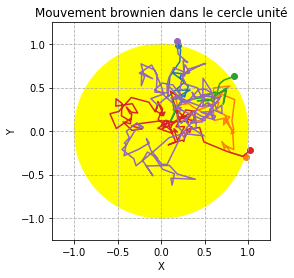

In [42]:
circle = plt.Circle((0,0), 1,color="yellow")
fig, ax = plt.subplots()
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1)
ax.set_aspect(1)
ax.add_artist(circle)
plt.title("Mouvement brownien dans le cercle unité")
plt.xlabel("X")
plt.ylabel("Y")
np.random.seed(10)
for _ in range(5): 
    B_M,W_intersection = brownian_motion(10000, [0.2,0.4], 0.01, rng)
    plt.plot(B_M[:, 0],B_M[:, 1])
    if W_intersection.all() !=None :
        plt.scatter(W_intersection[0],W_intersection[1])

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

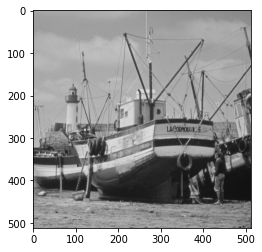

In [45]:
from PIL import Image
image = Image.open("img/boat.png")  
plt.imshow(image)
plt.axis('on')  # Hide axis
plt.show()

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

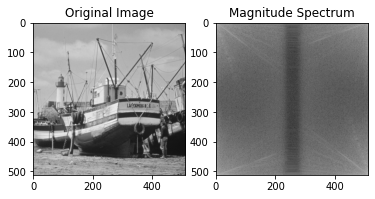

In [99]:
import scipy.fft
X = np.array(image) #Image transformed into  numpy array
fourier_transform = scipy.fft.fft2(X)
magnitude_spectrum = np.abs(fourier_transform)**2
plt.subplot(121), plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(np.log(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

2-a The pixel of the spectrum associated with the null frequency is located in borders of the image 

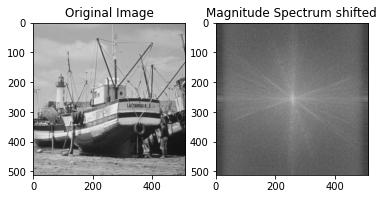

In [46]:
import scipy.fft
X = np.array(image) #Image transformed into  numpy array
fourier_transform = scipy.fft.fft2(X)
# Shift the zero frequency component to the center
fourier_transform_shifted = scipy.fft.fftshift(fourier_transform)
magnitude_spectrum = np.abs(fourier_transform_shifted)**2
plt.subplot(121), plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(np.log(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum shifted')
plt.show()




2-b The pixel of the spectrum associated with the null frequency is located in the center of the picture magnitude spectrum  


3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

In [103]:
def ideal_lowpass_filter(image, fc):
    """
    Apply an ideal low-pass filter to an image.

    Parameters:
    image (jpg): The input image.
    fc (tuple): The cutoff frequencies (fcy, fcx) along each dimension.

    Returns:
    numpy.ndarray: The filtered image.
    """
    image = np.array(image)
    # Perform 2D Fourier transform on the input image
    f_transform = np.fft.fft2(image)
    
    # Shift the zero frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Get the shape of the image and the center coordinates
    rows, cols = image.shape
    center_y, center_x = rows // 2, cols // 2
    
    # Create a mask for the ideal low-pass filter
    mask = np.zeros_like(image, dtype=np.float)
    fcy, fcx = fc
    mask[center_y - fcy:center_y + fcy, center_x - fcx:center_x + fcx] = 1.0
    
    # Apply the mask to the Fourier transform
    filtered_f_transform = f_transform_shifted * mask
    
    # Shift the zero frequency component back to the corner
    filtered_f_transform_shifted = np.fft.ifftshift(filtered_f_transform)
    
    # Inverse Fourier transform to get the filtered image
    filtered_image = np.fft.ifft2(filtered_f_transform_shifted)
    
    # Take the real part of the result
    filtered_image = np.abs(filtered_image).astype(np.uint8)
    
    return filtered_image


C:\Users\chadl\AppData\Local\Temp\ipykernel_10380\1709181004.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(image, dtype=np.float)


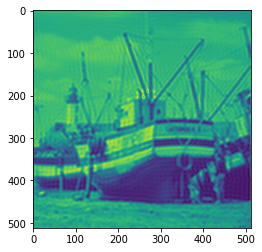

In [111]:
Result = ideal_lowpass_filter(image,(50,50))
plt.imshow(Result)

C:\Users\chadl\AppData\Local\Temp\ipykernel_10380\1709181004.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(image, dtype=np.float)


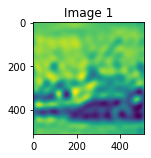

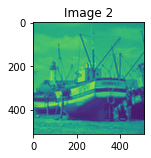

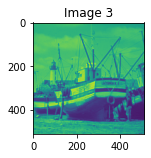

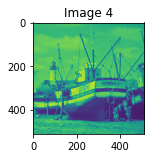

In [118]:
cut_off = [(10,10),(50,50),(70,100),(200,200)]
num_images = len(cut_off)
i = 0
for x in cut_off:
   
    num_rows = int(np.sqrt(num_images))
    num_cols = (num_images + num_rows - 1) // num_rows
    Result = ideal_lowpass_filter(image,x)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(Result)
    plt.title(f'Image {i + 1}')
    i+=1
    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()
    

    

2-b As the cutoff frequency increases the image seems to be much clearer 

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

**Answer:**

In [68]:
M2,N2 = 10,10
X =np.array(image)
M1,N1 = X.shape 
# Define the standard deviation (sigma)
sigma = 10
# Define the window size (adjust as needed)
window_size = 100

# Create a 1D Gaussian window
x = np.linspace(-window_size // 2, window_size // 2, window_size)
W_x =np.array(np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))).reshape(100,1)
W_y = np.array(np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))).reshape(100,1)
H = W_x @ W_y.T #Gaussien kernel



(100, 100)

In [69]:
import numpy as np

# Define your original matrix
original_matrix = np.array([[1, 2, 3],
                            [4, 5, 6],
                            [7, 8, 9]])

# Define the amount of zero-padding for rows and columns
pad_rows = 2  # Number of rows to pad at the top and bottom
pad_cols = 3  # Number of columns to pad at the left and right

# Calculate the new dimensions of the padded matrix
padded_rows = original_matrix.shape[0] + 2 * pad_rows
padded_cols = original_matrix.shape[1] + 2 * pad_cols

# Create a new matrix filled with zeros (padded_matrix)
padded_matrix = np.zeros((padded_rows, padded_cols), dtype=original_matrix.dtype)

# Copy the original matrix into the center of the padded matrix
padded_matrix[pad_rows:pad_rows + original_matrix.shape[0], pad_cols:pad_cols + original_matrix.shape[1]] = original_matrix

# Now, padded_matrix contains the original matrix with zero-padding
print("Original Matrix:")
print(original_matrix)
print("\nPadded Matrix:")
print(padded_matrix)


Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Padded Matrix:
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 3 0 0 0]
 [0 0 0 4 5 6 0 0 0]
 [0 0 0 7 8 9 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
